# Курсовой проект

## 1) Импортируем библиотеки

установим библиотеки, если не стоят:

In [1]:
!pip install CatBoost
!pip install sklearn
!pip install seaborn
!pip install hyperopt
!pip install numpy
!pip install pandas
!pip install matplotlib

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score, precision_score, recall_score
from catboost import CatBoostClassifier, cv, Pool
from hyperopt import hp
from hyperopt import fmin, tpe, hp, STATUS_OK, Trials

## Загружаем данные

In [3]:
train_df = pd.read_csv('course_project_train.csv')
test_df = pd.read_csv('course_project_test.csv')

In [4]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7500 entries, 0 to 7499
Data columns (total 17 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Home Ownership                7500 non-null   object 
 1   Annual Income                 5943 non-null   float64
 2   Years in current job          7129 non-null   object 
 3   Tax Liens                     7500 non-null   float64
 4   Number of Open Accounts       7500 non-null   float64
 5   Years of Credit History       7500 non-null   float64
 6   Maximum Open Credit           7500 non-null   float64
 7   Number of Credit Problems     7500 non-null   float64
 8   Months since last delinquent  3419 non-null   float64
 9   Bankruptcies                  7486 non-null   float64
 10  Purpose                       7500 non-null   object 
 11  Term                          7500 non-null   object 
 12  Current Loan Amount           7500 non-null   float64
 13  Cur

In [5]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2500 entries, 0 to 2499
Data columns (total 16 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Home Ownership                2500 non-null   object 
 1   Annual Income                 1987 non-null   float64
 2   Years in current job          2414 non-null   object 
 3   Tax Liens                     2500 non-null   float64
 4   Number of Open Accounts       2500 non-null   float64
 5   Years of Credit History       2500 non-null   float64
 6   Maximum Open Credit           2500 non-null   float64
 7   Number of Credit Problems     2500 non-null   float64
 8   Months since last delinquent  1142 non-null   float64
 9   Bankruptcies                  2497 non-null   float64
 10  Purpose                       2500 non-null   object 
 11  Term                          2500 non-null   object 
 12  Current Loan Amount           2500 non-null   float64
 13  Cur

In [6]:
train_df.head()

,Home Ownership,Annual Income,Years in current job,Tax Liens,Number of Open Accounts,Years of Credit History,Maximum Open Credit,Number of Credit Problems,Months since last delinquent,Bankruptcies,Purpose,Term,Current Loan Amount,Current Credit Balance,Monthly Debt,Credit Score,Credit Default
0,Own Home,482087.0,NaN,0.0,11.0,26.3,685960.0,1.0,NaN,1.0,debt consolidation,Short Term,99999999.0,47386.0,7914.0,749.0,0
1,Own Home,1025487.0,10+ years,0.0,15.0,15.3,1181730.0,0.0,NaN,0.0,debt consolidation,Long Term,264968.0,394972.0,18373.0,737.0,1
2,Home Mortgage,751412.0,8 years,0.0,11.0,35.0,1182434.0,0.0,NaN,0.0,debt consolidation,Short Term,99999999.0,308389.0,13651.0,742.0,0
3,Own Home,805068.0,6 years,0.0,8.0,22.5,147400.0,1.0,NaN,1.0,debt consolidation,Short Term,121396.0,95855.0,11338.0,694.0,0
4,Rent,776264.0,8 years,0.0,13.0,13.6,385836.0,1.0,NaN,0.0,debt consolidation,Short Term,125840.0,93309.0,7180.0,719.0,0


In [7]:
test_df.head()

,Home Ownership,Annual Income,Years in current job,Tax Liens,Number of Open Accounts,Years of Credit History,Maximum Open Credit,Number of Credit Problems,Months since last delinquent,Bankruptcies,Purpose,Term,Current Loan Amount,Current Credit Balance,Monthly Debt,Credit Score
0,Rent,NaN,4 years,0.0,9.0,12.5,220968.0,0.0,70.0,0.0,debt consolidation,Short Term,162470.0,105906.0,6813.0,NaN
1,Rent,231838.0,1 year,0.0,6.0,32.7,55946.0,0.0,8.0,0.0,educational expenses,Short Term,78298.0,46037.0,2318.0,699.0
2,Home Mortgage,1152540.0,3 years,0.0,10.0,13.7,204600.0,0.0,NaN,0.0,debt consolidation,Short Term,200178.0,146490.0,18729.0,7260.0
3,Home Mortgage,1220313.0,10+ years,0.0,16.0,17.0,456302.0,0.0,70.0,0.0,debt consolidation,Short Term,217382.0,213199.0,27559.0,739.0
4,Home Mortgage,2340952.0,6 years,0.0,11.0,23.6,1207272.0,0.0,NaN,0.0,debt consolidation,Long Term,777634.0,425391.0,42605.0,706.0


## Посмотрим на значения наших признаков

In [8]:
for cat_colname in train_df.columns:
    print(str(cat_colname) + '\n\n' + str(train_df[cat_colname].value_counts()) + '\n' + '*' * 100 + '\n')

Home Ownership

Home Mortgage    3637
Rent             3204
Own Home          647
Have Mortgage      12
Name: Home Ownership, dtype: int64
****************************************************************************************************

Annual Income

1043651.0    4
1161660.0    4
1338113.0    4
969475.0     4
1058376.0    4
            ..
2185646.0    1
2326075.0    1
330429.0     1
1704965.0    1
648166.0     1
Name: Annual Income, Length: 5478, dtype: int64
****************************************************************************************************

Years in current job

10+ years    2332
2 years       705
3 years       620
< 1 year      563
5 years       516
1 year        504
4 years       469
6 years       426
7 years       396
8 years       339
9 years       259
Name: Years in current job, dtype: int64
****************************************************************************************************

Tax Liens

0.0    7366
1.0      83
2.0      30
3.0      10
4.0    

У Текущей суммы кредита есть подозрительное значение 99999999 в большом количестве случаев.
Попробуем построить такой график:

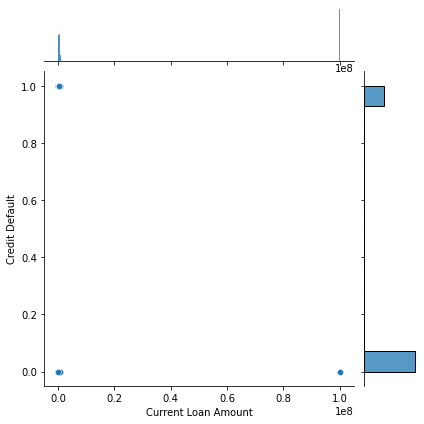

In [9]:
sns.jointplot(x='Current Loan Amount', y='Credit Default', 
              data=train_df, kind='scatter');

Credit Default - факт невыполнения кредитных обязательств, если я правильно понимаю, то 1 - означает невыполнение кредитных обязательств. На грфике видно, что при значении задолжности 99999999 - нет невыполненных кредитных обязательств, значит можно заменить его на 0:

In [10]:
train_mod = train_df.copy()
train_mod.loc[train_mod['Current Loan Amount'] == 99999999, 'Current Loan Amount'] = 0

Построим графики:

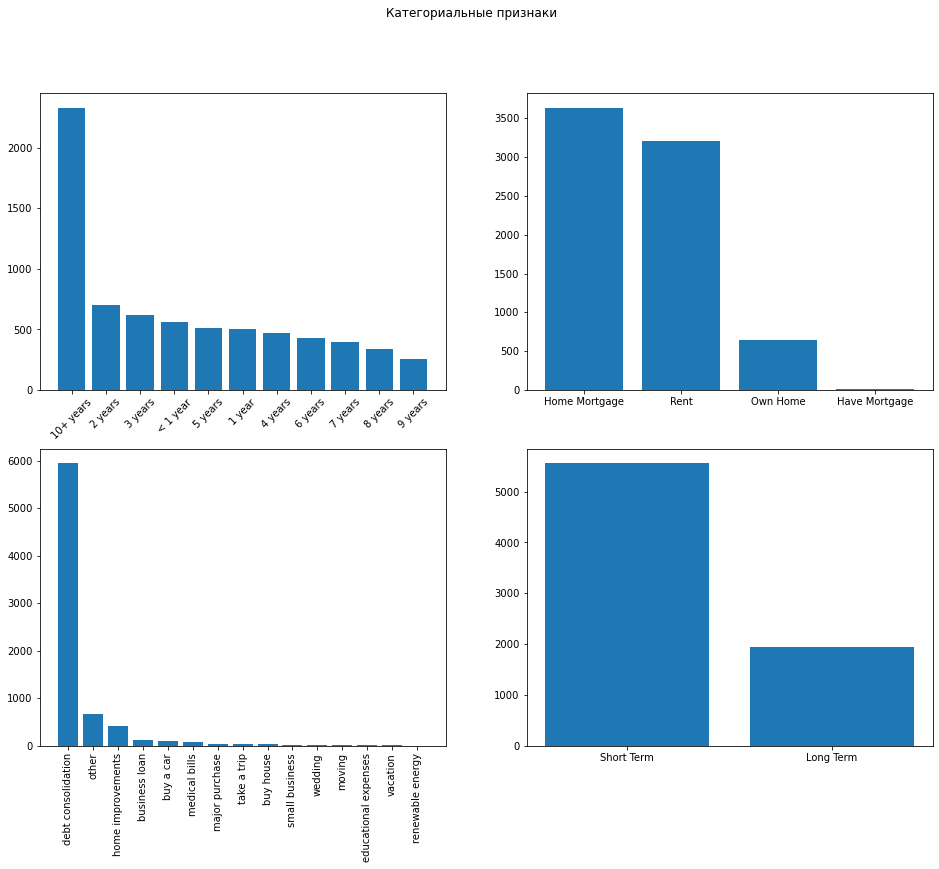

In [11]:
plt.rcParams['figure.figsize'] = [16, 12]
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2)

ax1.bar(train_df['Years in current job'].value_counts().index, train_df['Years in current job'].value_counts().values)
ax2.bar(train_df['Home Ownership'].value_counts().index, train_df['Home Ownership'].value_counts().values)
ax3.bar(train_df['Purpose'].value_counts().index, train_df['Purpose'].value_counts().values)
ax4.bar(train_df['Term'].value_counts().index, train_df['Term'].value_counts().values)

fig.suptitle('Категориальные признаки')
ax1.xaxis.set_tick_params(rotation=45)
ax3.xaxis.set_tick_params(rotation=90)

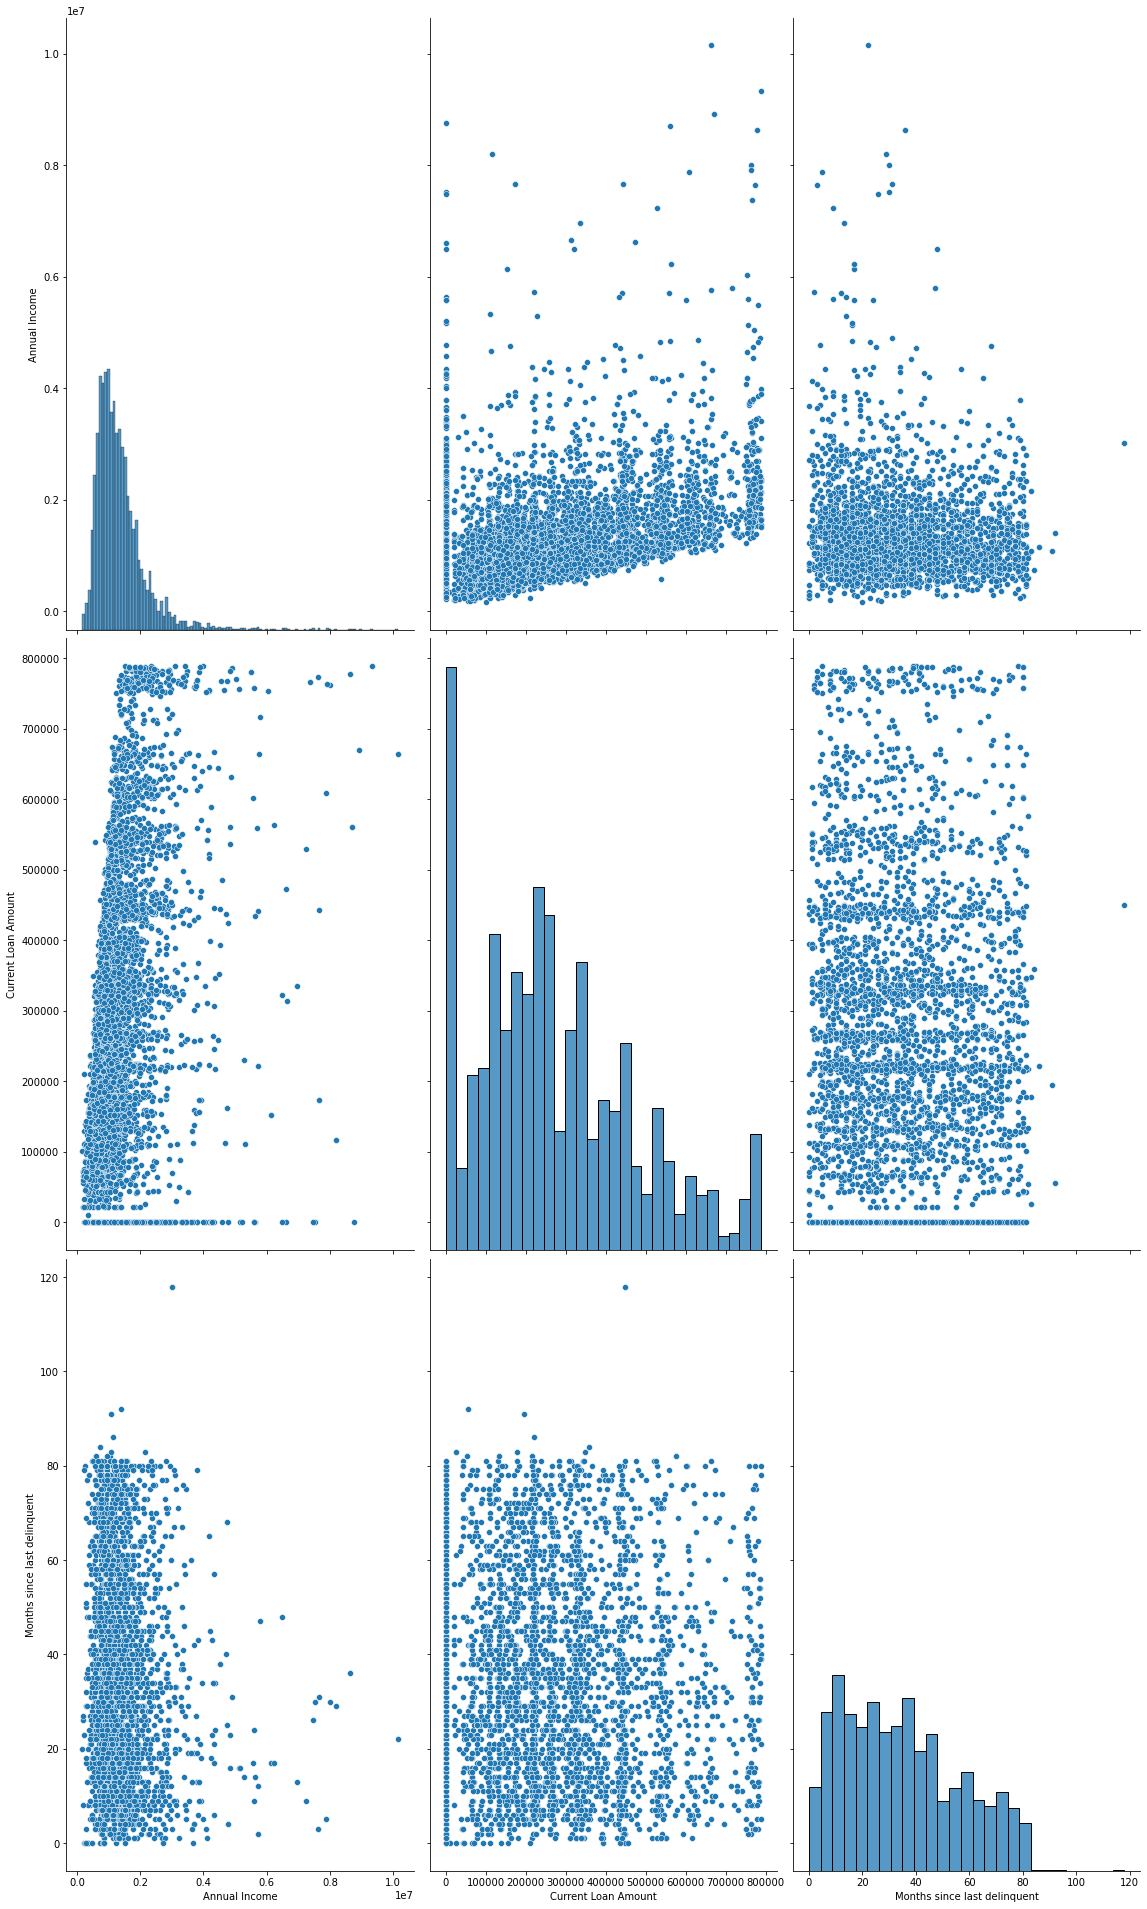

In [12]:
sns.pairplot(train_mod[['Annual Income', 'Current Loan Amount', 'Months since last delinquent']], height=9, aspect=0.6)

Продолжительность работы представлена текстом переведем в числа. Тех, у кого в столбце продолжительности работы пустое значение - вставляем ноль.

In [13]:
train_mod['Years in current job'] = train_mod['Years in current job'].fillna('0').map({'0': 0, '< 1 year': 1, '1 year': 2, '2 years': 3,
                                                                                       '3 years': 4, '4 years': 5, '5 years': 6, '6 years': 7, 
                                                                                       '7 years': 8, '8 years': 9, '9 years': 10, '10+ years': 11})
train_mod.head()

,Home Ownership,Annual Income,Years in current job,Tax Liens,Number of Open Accounts,Years of Credit History,Maximum Open Credit,Number of Credit Problems,Months since last delinquent,Bankruptcies,Purpose,Term,Current Loan Amount,Current Credit Balance,Monthly Debt,Credit Score,Credit Default
0,Own Home,482087.0,0,0.0,11.0,26.3,685960.0,1.0,NaN,1.0,debt consolidation,Short Term,0.0,47386.0,7914.0,749.0,0
1,Own Home,1025487.0,11,0.0,15.0,15.3,1181730.0,0.0,NaN,0.0,debt consolidation,Long Term,264968.0,394972.0,18373.0,737.0,1
2,Home Mortgage,751412.0,9,0.0,11.0,35.0,1182434.0,0.0,NaN,0.0,debt consolidation,Short Term,0.0,308389.0,13651.0,742.0,0
3,Own Home,805068.0,7,0.0,8.0,22.5,147400.0,1.0,NaN,1.0,debt consolidation,Short Term,121396.0,95855.0,11338.0,694.0,0
4,Rent,776264.0,9,0.0,13.0,13.6,385836.0,1.0,NaN,0.0,debt consolidation,Short Term,125840.0,93309.0,7180.0,719.0,0


Заполняем пропуски:

In [14]:
# что-то заполняем нулями
train_mod.loc[:, ['Months since last delinquent', 'Bankruptcies', 'Credit Score']] = train_mod.loc[:, ['Months since last delinquent', 
                                                                                                       'Bankruptcies', 'Credit Score']].fillna(value=0)
# что-то средним значением
train_mod['Annual Income'].fillna(value=train_mod['Annual Income'].mean(), inplace=True)
train_mod.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7500 entries, 0 to 7499
Data columns (total 17 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Home Ownership                7500 non-null   object 
 1   Annual Income                 7500 non-null   float64
 2   Years in current job          7500 non-null   int64  
 3   Tax Liens                     7500 non-null   float64
 4   Number of Open Accounts       7500 non-null   float64
 5   Years of Credit History       7500 non-null   float64
 6   Maximum Open Credit           7500 non-null   float64
 7   Number of Credit Problems     7500 non-null   float64
 8   Months since last delinquent  7500 non-null   float64
 9   Bankruptcies                  7500 non-null   float64
 10  Purpose                       7500 non-null   object 
 11  Term                          7500 non-null   object 
 12  Current Loan Amount           7500 non-null   float64
 13  Cur

Смотрим сбалансированность классов:

In [15]:
train_df['Credit Default'].value_counts()

0    5387
1    2113
Name: Credit Default, dtype: int64

Попробую использовать CatBoost, много категориальных фич, должно сработать хорошо:

In [16]:
categorical_features_indices = np.where((train_mod.dtypes == object))[0]
categorical_features_names = train_mod.iloc[:, list(np.where(train_mod.dtypes == object)[0])].columns

Разбиваем данные на тренировачную и валидационную выборки

In [17]:
X_train, X_valid, y_train, y_valid = train_test_split(train_mod.drop('Credit Default', axis=1), train_mod['Credit Default'], train_size=0.75, random_state=42)

Метод для обучения модели:

In [18]:
def train_best_model(X_tr, y_tr, X_val, y_val, X_all, y_all, const_params, cat_features, max_evals=100):
    trainset = Pool(X_tr, y_tr, cat_features=cat_features)
    validset = Pool(X_val, y_val, cat_features=cat_features)
    dataset = Pool(X_all, y_all, cat_features=cat_features)
    # Долго подбирал разные параметры, вот эти вроде норм
    best = {'depth': 6, 'iterations': 23, 'l2_leaf_reg': 8.117772445950266, 'learning_rate': 0.8812363810552764, 'task_type': 'CPU', 'loss_function': 'Logloss', 'eval_metric': 'F1', 'custom_metric': ['F1'], 'class_weights': [1, 2.549455750118315], 'verbose': 200}
  
    hyper_params = best.copy()
    hyper_params.update(const_params)
    
    model = CatBoostClassifier(**hyper_params)
    model.fit(dataset, verbose=False)
    
    return model, hyper_params


In [19]:
w = train_df['Credit Default'].value_counts()[0] / train_df['Credit Default'].value_counts()[1]
const_params = dict({'task_type': 'CPU',
                    'loss_function': 'Logloss',
                    'eval_metric': 'F1', 
                    'custom_metric': ['F1'],
                    'class_weights': [1, w],
                    'verbose': 200})

In [20]:
model, params = train_best_model(X_train, y_train, X_valid, y_valid,
                                 train_mod.drop('Credit Default', axis=1), train_mod['Credit Default'],
                                 const_params, categorical_features_indices, max_evals=10)
# обучили модель

Оцениваем важность фич

<BarContainer object of 16 artists>

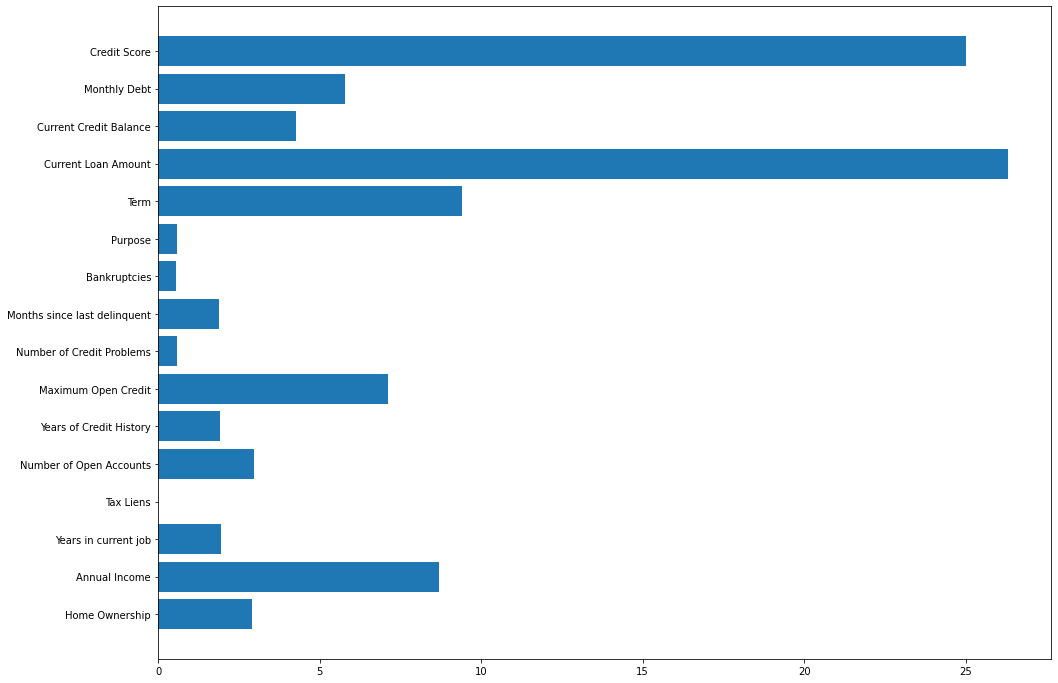

In [21]:
plt.barh(train_mod.drop('Credit Default', axis=1).columns, model.get_feature_importance())

Делаем предсказание:

In [22]:
preds = model.predict(train_mod.drop('Credit Default', axis=1))
f1_sc = f1_score(train_mod['Credit Default'], preds)
p_score = precision_score(train_mod['Credit Default'], preds)
r_score = recall_score(train_mod['Credit Default'], preds)
print('F1-score: {:.3}\nWith precision = {:.3} and recall = {:.3}'.format(f1_sc, p_score, r_score))

F1-score: 0.621
With precision = 0.538 and recall = 0.735


Удовлетворяет условиям задачи, поэтому готовим тестовые данные и делаем предсказание: 

In [23]:
test_mod = test_df.copy()
test_mod.loc[test_mod['Current Loan Amount'] == 99999999, 'Current Loan Amount'] = 0 
test_mod['Years in current job'] = test_mod['Years in current job'].fillna('0').map({'0': 0, '< 1 year': 1, '1 year': 2, '2 years': 3,
                                                                                     '3 years': 4, '4 years': 5, '5 years': 6, '6 years': 7, 
                                                                                     '7 years': 8, '8 years': 9, '9 years': 10, '10+ years': 11})
test_mod.loc[:, ['Months since last delinquent', 'Bankruptcies', 'Credit Score']] = test_mod.loc[:, ['Months since last delinquent', 
                                                                                                     'Bankruptcies', 'Credit Score']].fillna(value=0)
test_mod['Annual Income'].fillna(value=train_mod['Annual Income'].mean(), inplace=True)
test_mod.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2500 entries, 0 to 2499
Data columns (total 16 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Home Ownership                2500 non-null   object 
 1   Annual Income                 2500 non-null   float64
 2   Years in current job          2500 non-null   int64  
 3   Tax Liens                     2500 non-null   float64
 4   Number of Open Accounts       2500 non-null   float64
 5   Years of Credit History       2500 non-null   float64
 6   Maximum Open Credit           2500 non-null   float64
 7   Number of Credit Problems     2500 non-null   float64
 8   Months since last delinquent  2500 non-null   float64
 9   Bankruptcies                  2500 non-null   float64
 10  Purpose                       2500 non-null   object 
 11  Term                          2500 non-null   object 
 12  Current Loan Amount           2500 non-null   float64
 13  Cur

In [24]:
final_preds = model.predict(test_mod) # предсказание на обученной ранее модели
predicted_df = pd.DataFrame(final_preds, columns=['Credit Default']) # готовим датафрейм
predicted_df.to_csv('AOSerebryakov.csv', index_label='id') # записываем в файл

In [25]:
predicted_df.head()

,Credit Default
0,1
1,1
2,1
3,0
4,0
